<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



 **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.

    Chcemy zminimalizować funkcję L po lambdzie:

    $$
    L(y,\lambda) = -ylog(\sigma(\lambda))-(1-y)log(1-\sigma(\lambda))
    $$

    Alternatywnie, możemy zapisać funkcję L jako:

    $$
    L(y, \lambda) = ylog(1+e^{-\lambda})+(1-y)log(1+\frac{1}{e^{-\lambda}})
    $$

    Wtedy, pochodna funckji L ma postać:

    $$
    {\frac{dL}{d\lambda}} = y\frac{-e^{-\lambda}}{1+e^{-\lambda}}+(1-y)\frac{1}{1+e^{-\lambda}}
    $$

    Przyrównujemy pochodną do zera, aby znaleźć minimum funkcji, oraz używamy faktu, że m to liczba jedynek, a k to liczba zer. Wtedy, otrzymujemy równanie:

    $$
    0 = m\frac{-e^{-\lambda}}{1+e^{-\lambda}}+k\frac{1}{1+e^{-\lambda}}
    $$

    Mnożymy obustronnie przez ${1+e^{-\lambda}}$ i przekształcamy. W ten sposób otrzymujemy wzór na $\lambda^{*}$:

    $$
    \lambda^{*} = log(\frac{m}{k})
    $$

    Zatem, otrzymana optymalna $\lambda^{*}$ reprezentuje logarytm stosunku jedynek do zer w badanym zbiorze danych.


**Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$

    Postępujemy analogicznie jak wyżej. Chcemy zminimalizować funkcję po $\lambda$:

    $$
    L(y,\lambda + f) = ∑-y_ilog(\sigma(f_i+\lambda))-(1-y_i)log(1-\sigma(f_i+\lambda))
    $$

    Różniczkując stronami, a następnie przyrównując do zera otrzymujemy:

    $$
    0 = \sum \frac{1}{1+e^{-f_i-\lambda}} (y_ie^{-f_i-\lambda}+(1-y_i))
    $$

    Dla powyższego równania nie jest możliwe zaprezentowanie jawnego wzoru na optymalne $λ^*$, tak jak miało to miejsce dla scenariusza A. Dzieje się tak, gdyż wcześniej $\sigma(\lambda)$ była niezależna od konkretnych obserwacji, przez co łatwiej można było przekształcać równanie. W przypadku B, każda obserwacja jest przesunięta o nieliniową wartość $\sigma(f_i+\lambda)$, przez co niemożliwe jest przekształcenie analogiczne jak w A i trzeba posiłkować się metodami numerycznymi w rozwiązaniu tego równania.

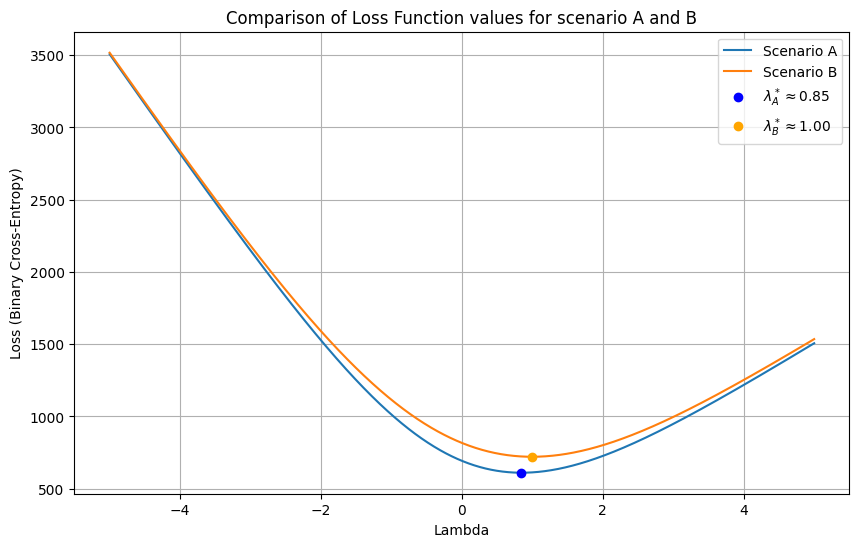

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# defining loss functions
def loss_A(y, i):
  return -np.sum(y * np.log(expit(i)) + (1 - y) * np.log(1 - expit(i)))

def loss_B(y, f, i):
  return -np.sum(y * np.log(expit(f + i)) + (1 - y) * np.log(1 - expit(f + i)))

# preparing dataset
m = 700     # number of ones
k = 300     # number of zeros
n = m + k

y = np.array([1]*m + [0]*k)
np.random.seed(42)
f = np.random.normal(0, 1, size = n)

# set of lambdas that will be tested
lambdas = np.linspace(-5, 5, 1000)

# calculating values of loss funtions for every lambda
loss_values_A = [loss_A(y, i) for i in lambdas]
loss_values_B = [loss_B(y, f, i) for i in lambdas]


# finding optimal lambda
optimal_lambda_index_A = np.argmin(loss_values_A)
optimal_lambda_index_B = np.argmin(loss_values_B)

optimal_lambda_A = lambdas[optimal_lambda_index_A] # ≈0.85 which is consistent with our privious analysis since log(700/300)≈0.85
optimal_lambda_B = lambdas[optimal_lambda_index_B]

# plotting results
plt.figure(figsize = (10,6))
plt.plot(lambdas, loss_values_A, label = 'Scenario A')
plt.plot(lambdas, loss_values_B, label = 'Scenario B')
plt.xlabel('Lambda')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.plot(optimal_lambda_A, loss_values_A[optimal_lambda_index_A], 'o', color='blue', label=rf'$\lambda^*_A \approx {optimal_lambda_A:.2f}$')
plt.plot(optimal_lambda_B, loss_values_B[optimal_lambda_index_B],  'o', color='orange', label=rf'$\lambda^*_B \approx {optimal_lambda_B:.2f}$')
plt.legend()
plt.title('Comparison of Loss Function values for scenario A and B')
plt.grid(True)
plt.show()

**Discussion: Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?**

*Loss landscape* w przypadku A jest mniej skomplikowane niż w scenariuszu B. Dzieje się tak, gdyż w A dla funkcji straty dla każdej obserwacji używamy tego samego sigmoidy $\sigma(\lambda)$. Dzięki temu, funkcja straty staje się gładką funkcją zależną wyłącnie od *y* i $\lambda$, co znacznie upraszcza problem znalezienia optymalnej $\lambda^*$ - jest to logarytm ze stosunku liczby jedynek do liczby zer w bazie danych. Pochodną funkcji straty można przekształcić wtedy do postaci:

  $$
  \frac{dL}{d\lambda} = \frac{1}{1+e^{-\lambda}}(-e^{-\lambda}m+k)
  $$

Zatem drugą pochodną można zapisać jako;

  $$
  \frac{e^{\lambda}}{(1+e^{\lambda})^2}
  $$

Czyli druga pochodna jest dodatnia, zatem funkcja jest wypukła. Z postaci pierwszej pochodnej widzimy, że, dla ustalonych m i k, funkcja jest malejąca poniżej log(m/k) i rosnąca powyżej tej wartości. Zatem, funkcja ma minimum globalne i jest *unimodal*.

Patrząc na przeprowadzony powyżej eksperyment w Pythonie, funkcja straty dla scenariusza B też będzie *unimodal*. W związku z tym, można stwierdzić, że trudność dla B powstaje głównie z powodu nieliniowości i potrzeby użycia metod numerycznych do wyliczenia minimum i optymalnej $\lambda^*$.